<a href="https://colab.research.google.com/github/nandakishore2696/Deep_Learning_CX/blob/main/26_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

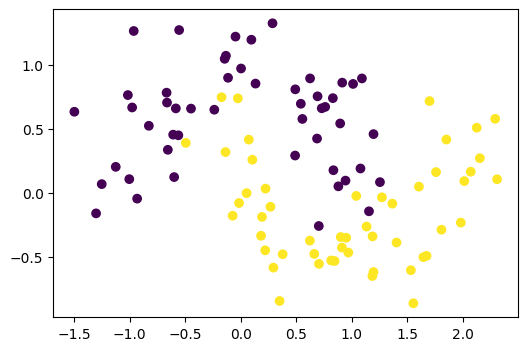

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [5]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

4688/4688 [==============================] - 8s 2ms/step


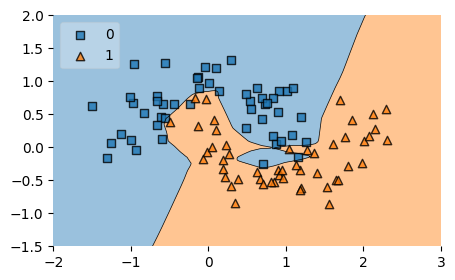

In [14]:
plt.figure(figsize=(5,3))
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

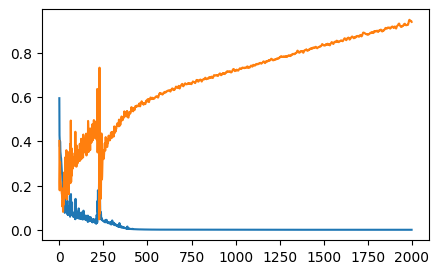

In [13]:
plt.figure(figsize=(5,3))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

# L2 Regularizer

In [15]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

4688/4688 [==============================] - 7s 2ms/step


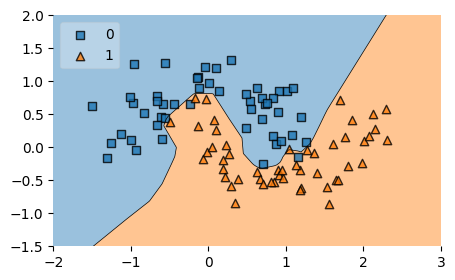

In [17]:
plt.figure(figsize=(5,3))
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

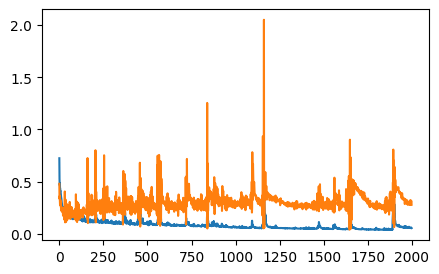

In [18]:
plt.figure(figsize=(5,3))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [19]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

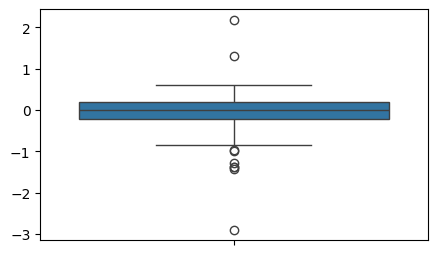

In [20]:
plt.figure(figsize=(5,3))
sns.boxplot(model1_weight_layer1)

<Axes: >

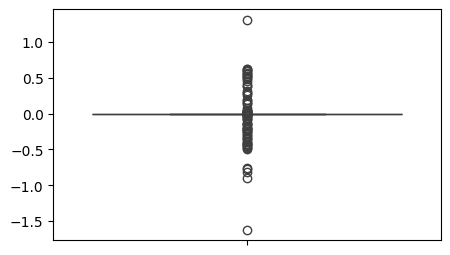

In [21]:
plt.figure(figsize=(5,3))
sns.boxplot(model2_weight_layer1)

In [22]:
model1_weight_layer1.min()

-2.8945541

In [41]:
model1_weight_layer1.max()

2.1883323

In [23]:
model2_weight_layer1.min()

-1.6196734

In [42]:
model2_weight_layer1.max()

1.3063135

<Axes: ylabel='Density'>

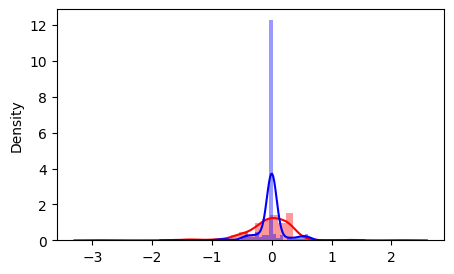

In [29]:
plt.figure(figsize=(5,3))
sns.distplot(model1_weight_layer1,color='red')
sns.distplot(model2_weight_layer1,color='blue')

# L1 Regularization

In [30]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

4688/4688 [==============================] - 7s 2ms/step


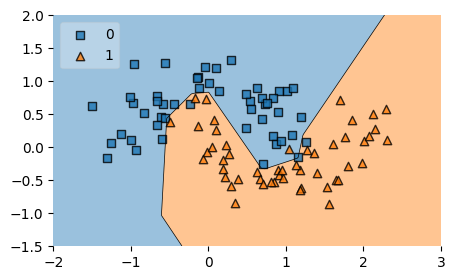

In [32]:
plt.figure(figsize=(5,3))
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

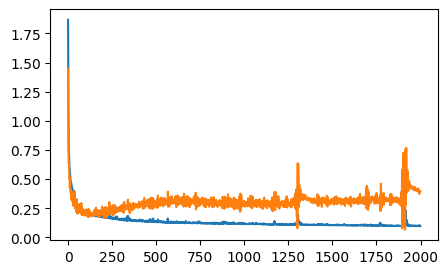

In [33]:
plt.figure(figsize=(5,3))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [34]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

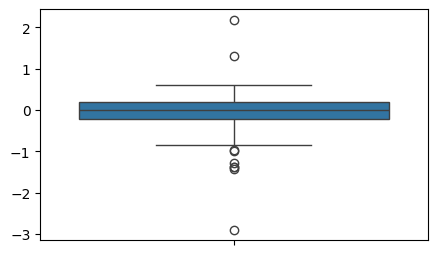

In [35]:
plt.figure(figsize=(5,3))
sns.boxplot(model1_weight_layer1)

<Axes: >

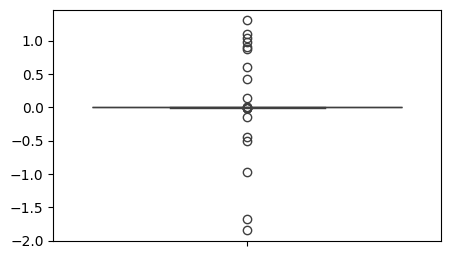

In [36]:
plt.figure(figsize=(5,3))
sns.boxplot(model2_weight_layer1)

In [37]:
model1_weight_layer1.min()

-2.8945541

In [38]:
model2_weight_layer1.min()

-1.8487252

<Axes: ylabel='Density'>

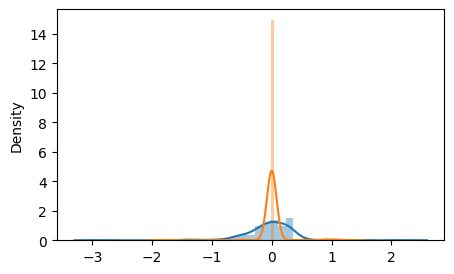

In [39]:
plt.figure(figsize=(5,3))
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [40]:
model1.get_weights()[0].reshape(256)

array([ 9.81472898e-03,  1.28909141e-01,  3.26211244e-01,  2.67302930e-01,
       -3.03764701e-01, -2.34205171e-01, -1.42575741e-01, -2.49670491e-01,
       -2.27122337e-01,  1.98499903e-01, -2.51400232e-01,  1.32336169e-01,
        1.00592889e-01,  9.48628224e-03,  2.28590786e-01, -4.94645983e-01,
        2.89472520e-01,  9.73393768e-02, -1.69977441e-01,  3.48780811e-01,
        1.54742852e-01, -2.19085794e-02, -2.09141254e-01,  3.19332540e-01,
        1.67209819e-01, -3.67766380e-01, -4.49517339e-01, -4.92252767e-01,
       -5.89167535e-01, -2.45471731e-01, -1.46556124e-01, -1.84961632e-01,
        3.31755042e-01,  2.23481402e-01,  3.12305510e-01,  8.25250745e-02,
       -2.29821771e-01, -6.08215988e-01, -4.84907389e-01,  2.66058683e-01,
       -5.42738020e-01, -1.31272599e-02,  2.83427060e-01, -2.62094408e-01,
       -3.16658951e-02,  2.63180584e-01,  8.46197829e-03, -3.86280030e-01,
       -2.73884475e-01,  3.45004015e-02,  3.17591727e-01,  9.61334407e-02,
       -4.59456891e-01,  